In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("powerplant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there are 908 rows and 25 columns present.

there are many Nan values present

our target variable will be capacity_mw and primary_fuel


In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

as i can see there are columns like other_fuel3,wepp_id, estimated_generation_gwh are completely empty hence we will drop these columns.

we will drop other_fuel2 column as there is ony one data filled rest 907 rows are empty.

we will drop other_fuel1 column as more than 75% of data is missing and it will be of no use to impute all the the data.

In [4]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [5]:
df['country'].unique()

array(['IND'], dtype=object)

In [6]:
df['country_long'].unique()

array(['India'], dtype=object)

i will drop country and country_long columns as it has one same value which will not help us in ML.

In [7]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [8]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

these are the name of the columns

In [10]:
df.dtypes

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

there are 8 object datatypes present and rest is float datatype columns

In [16]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

there are many null values are present we need to impute these values.

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 columns mean is more than median skewness might be present.

<AxesSubplot:xlabel='latitude', ylabel='Density'>

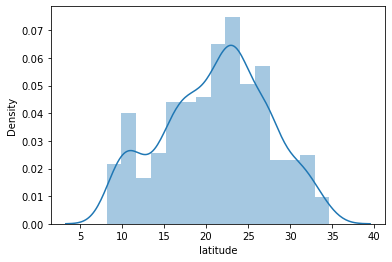

In [13]:
sn.distplot(df['latitude'])

graph is skewed

In [14]:
df['latitude'].fillna(df['latitude'].median(),inplace=True)

imputed null values with the median values

<AxesSubplot:xlabel='longitude', ylabel='Density'>

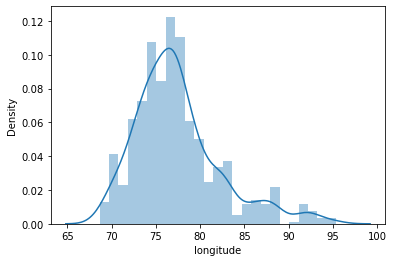

In [15]:
sn.distplot(df['longitude'])

graph is skewed

In [17]:
df['longitude'].fillna(df['longitude'].median(),inplace=True)

imputed null values with median

In [18]:
df['commissioning_year'].mode()

0    2013.0
dtype: float64

In [19]:
df['commissioning_year'].fillna(2013.0,inplace=True)

imputed null values with mode

In [20]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [21]:
df['geolocation_source'].mode()

0    WRI
dtype: object

In [22]:
df['geolocation_source'].fillna('WRI',inplace=True)

imputed null values with mode

In [23]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [24]:
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [25]:
df['year_of_capacity_data'].mode()

0    2018.0
dtype: float64

imputed null values with mode, as we can see there is one value 2018 common in all, it will not help us in ML hence we will drop this column as well.

In [29]:
df['year_of_capacity_data'].fillna(2018.0,inplace=True)

In [30]:
df['year_of_capacity_data'].unique()

array([2018.])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

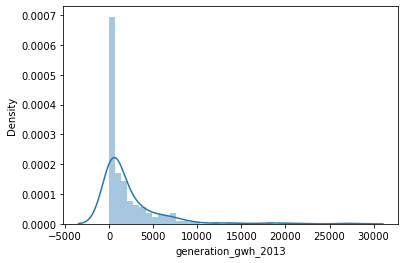

In [31]:
sn.distplot(df['generation_gwh_2013'])

graph is skewed

In [32]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace=True)

imputing null values

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

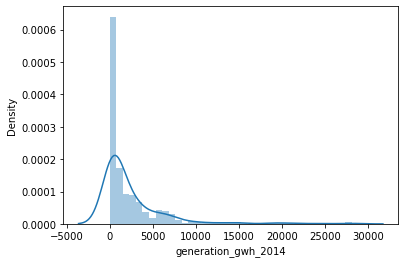

In [33]:
sn.distplot(df['generation_gwh_2014'])

graph is skewed

In [34]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True)

imputed null values with median

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

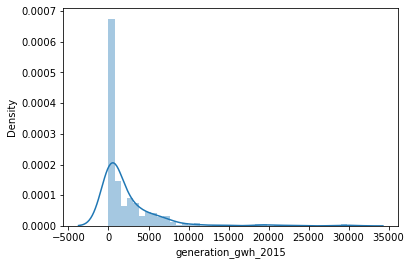

In [35]:
sn.distplot(df['generation_gwh_2015'])

graph is skewed

In [36]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True)

imputed null values with median

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

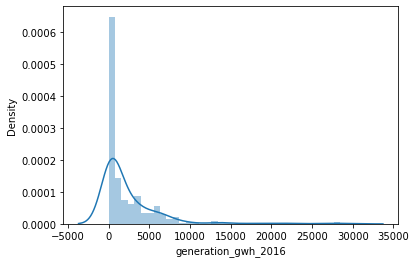

In [37]:
sn.distplot(df['generation_gwh_2016'])

graph is skewed

In [38]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True)

imputed null values with median

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

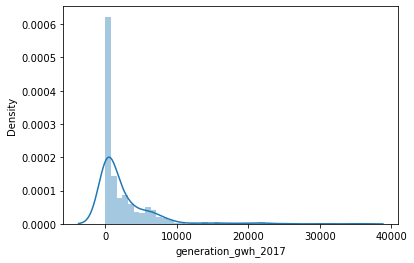

In [39]:
sn.distplot(df['generation_gwh_2017'])

graph is skewed

In [40]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True)

imputed null values with median

In [42]:
df['generation_data_source'].mode()

0    Central Electricity Authority
dtype: object

In [43]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [44]:
df['generation_data_source'].fillna('Central Electricity Authority',inplace=True)

imputed null values with mode, we can see that only one value Central Electricity Authority data is common is all rows hence we will drop this column

In [45]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
dtype: int64

owner column we need to drop it hence did not impute it, name column will drop it as its diffrenet for every row, url will drop it as its different for all rows, source will drop it as its diffrent for many data, gddp_idnr also will drop as its in object adatype and unique for every row 

In [47]:
df.drop(columns=['owner','name','generation_data_source','year_of_capacity_data','url','source','gppd_idnr'],axis=1,inplace=True)

In [48]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,Coal,2013.0,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,Wind,2013.0,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,WRI,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,2013.0,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,Wind,2013.0,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,Coal,2013.0,WRI,797.063475,805.760000,701.027250,716.728350,807.601700


In [50]:
a=df.describe(include=['O']).columns

saving all the object datatype in a variable

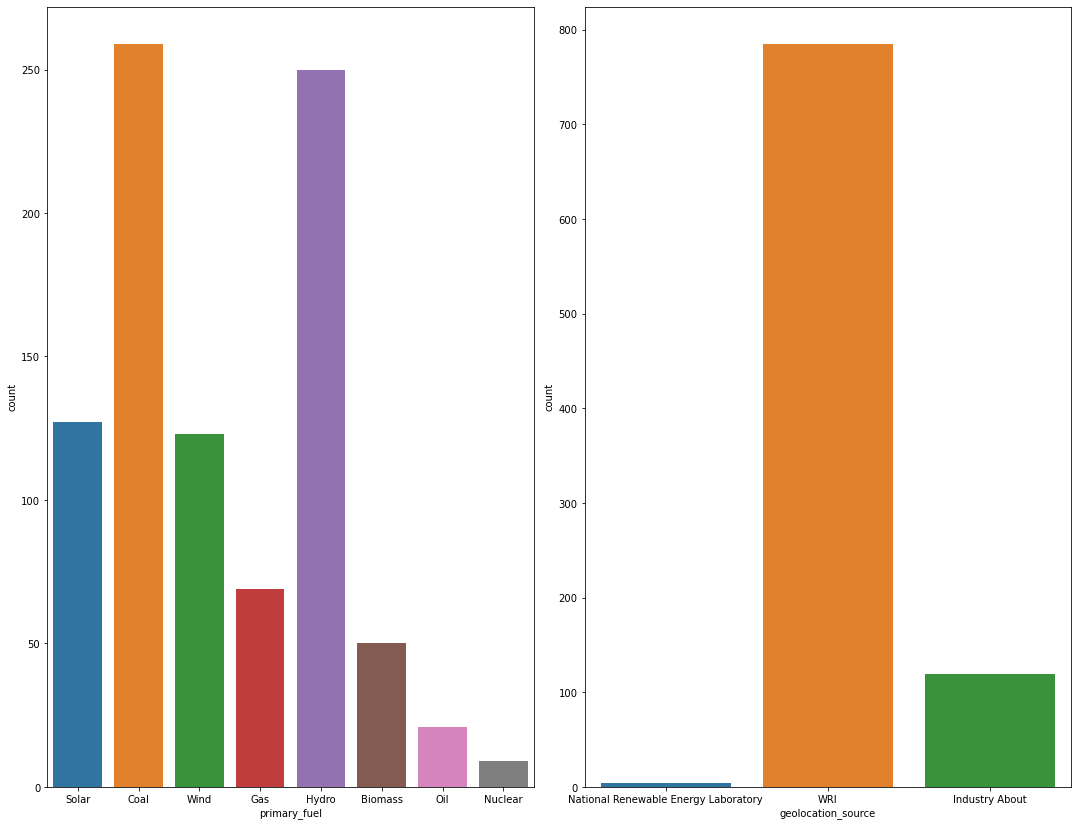

In [51]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    sn.countplot(df[a[i]])
    plt.tight_layout()

max power plan primary fuel is coal and then followed by hydro, least is nuclear

max geolocation souce is WRI

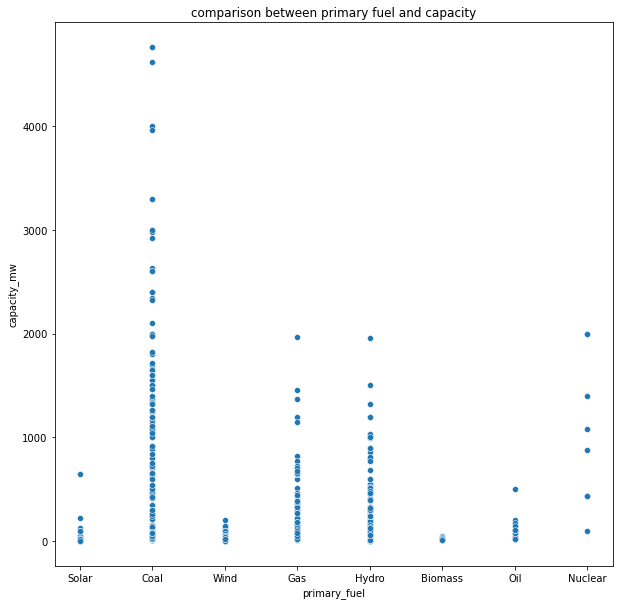

In [52]:
plt.figure(figsize=[10,10])
plt.title("comparison between primary fuel and capacity")
sn.scatterplot(df['primary_fuel'],df['capacity_mw']);

generation capacity of coal looks more than other fuels

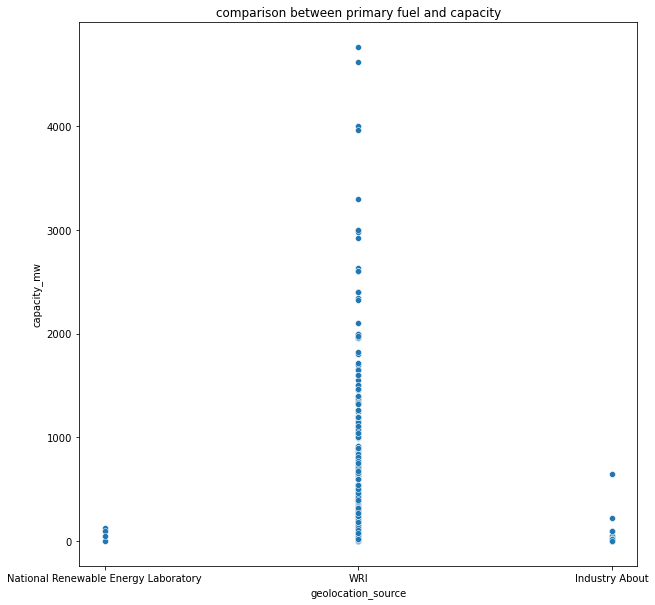

In [53]:
plt.figure(figsize=[10,10])
plt.title("comparison between primary fuel and capacity")
sn.scatterplot(df['geolocation_source'],df['capacity_mw']);

WRI geoloaction sorce has maxinmum generation capacity

In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
for i in a:
    df[i]=LB.fit_transform(df[i])

encoding the object datatype column

In [55]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2013.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2013.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2013.0,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2013.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2013.0,2,797.063475,805.760000,701.027250,716.728350,807.601700


<AxesSubplot:>

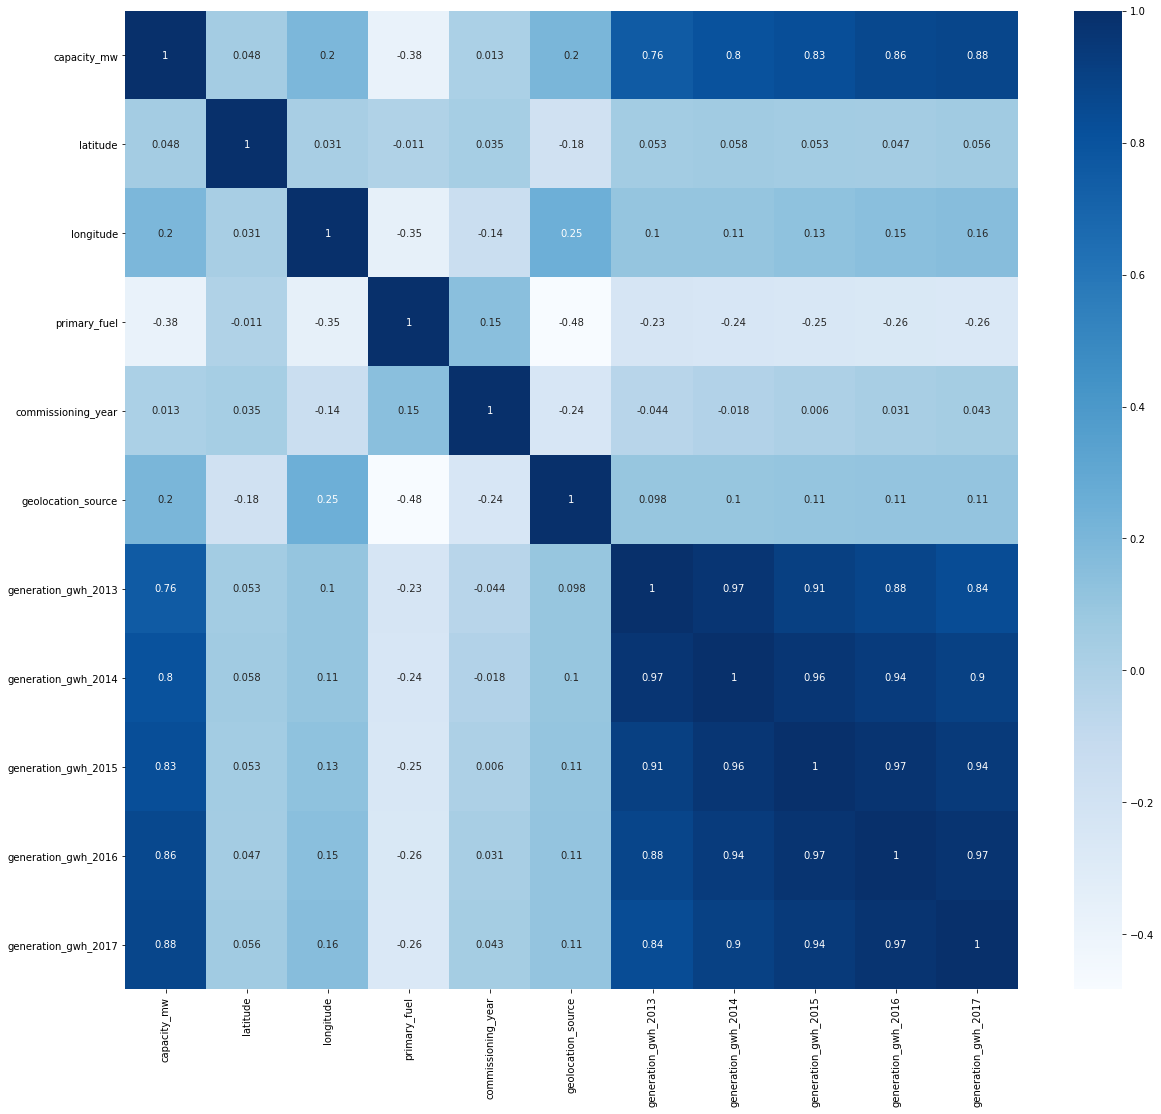

In [56]:
df_correlation=df.corr()
plt.figure(figsize=(20,18))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

for capacity_mw target variable-
generation_gwh_2013,2014,2015,2016,2017 have high correlation, they are highly correlated with each other too.

for primary_fuel target variable-
not much of a correlation can be seen, it can be a bad model, highes correlation with target variable is with commisioning year

capacity_mw               AxesSubplot(0.125,0.657941;0.0824468x0.222059)
latitude               AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
longitude              AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
primary_fuel           AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
commissioning_year     AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
geolocation_source     AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
generation_gwh_2013    AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
generation_gwh_2014    AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
generation_gwh_2015       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
generation_gwh_2016    AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
generation_gwh_2017    AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
dtype: object

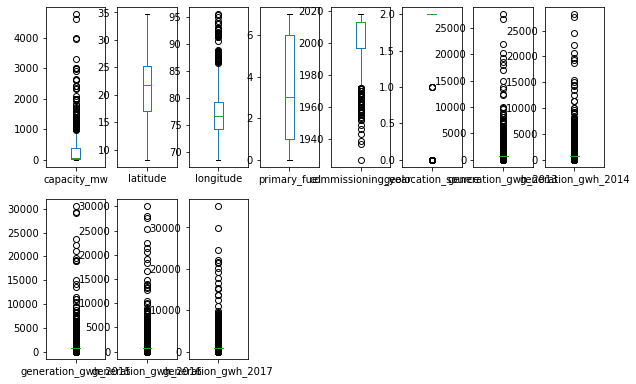

In [58]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,10))

there are many outliers present in the multiple columns.

In [59]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
        184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
        309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
        365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
        494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
        530, 533, 533, 539, 542, 547, 575, 584, 602, 622, 624, 639, 649,
        649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696,
        696, 696, 696, 707, 710, 722, 722, 722, 722, 722, 725, 725, 725,
        725, 725, 727, 727, 727, 727, 727, 727, 729, 787, 787, 787, 787,
        787, 787, 789, 808, 809, 809, 809, 809, 809, 809, 819, 848, 849,
        849, 881, 881, 881, 881, 881, 881], dtype=int64),
 array([ 0,  8,  9, 10,  0,  6,  7,  8,  9, 10,  6,  7,  2,  2,  0,  6,  7,
         8,  9, 10,  4,  2,  2,  0,  6,  7,  8,  9, 10,  2,  2,  2,  4,  2,
         0,  0,  6,  7,  8,  9, 10,  4,  0,  2,  2,  2,  4, 

In [60]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(849, 11)

In [61]:
df.shape

(908, 11)

In [62]:
Data_loss=((908-849)/908)*100
Data_loss

6.497797356828194

In [ ]:
as the data loss is less than 7% we can remove the outleirs

In [79]:
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']
print(x.shape)
print(y.shape)

(849, 10)
(849,)


splitting the x and y variable

In [94]:
x.skew()

latitude              -0.124563
longitude              0.729511
primary_fuel           0.407005
commissioning_year    -1.618612
geolocation_source    -2.062603
generation_gwh_2013    0.411630
generation_gwh_2014    0.300049
generation_gwh_2015    0.449578
generation_gwh_2016    0.447591
generation_gwh_2017    0.292883
dtype: float64

skewness present in multiple column was removed by using below methods

In [81]:
x['generation_gwh_2013']=np.cbrt(x['generation_gwh_2013'])

In [83]:
x['generation_gwh_2014']=np.cbrt(x['generation_gwh_2014'])

In [85]:
x['generation_gwh_2015']=np.cbrt(x['generation_gwh_2015'])

In [87]:
x['generation_gwh_2016']=np.cbrt(x['generation_gwh_2016'])

In [89]:
x['generation_gwh_2017']=np.cbrt(x['generation_gwh_2017'])

In [93]:
x['longitude']=np.log1p(x['longitude'])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,1.151300,-0.895357,1.171760,0.456050,-1.034548,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
1,0.593063,-0.551409,-0.978747,0.606035,0.407704,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
2,0.125497,-1.901071,1.601862,0.606035,0.407704,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
3,0.446856,3.238620,-0.548645,-0.068898,0.407704,-0.266451,-0.273974,0.075190,0.09040,-0.202453
4,0.134726,1.303209,-0.978747,0.756020,0.407704,0.728142,1.422040,2.399137,2.40543,2.058641


scaled the dataset

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [97]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [98]:
chosen_model(SVR)

best accuracy is 0 on random state 0


In [99]:
chosen_model(LinearRegression)

best accuracy is 0.605221371147886 on random state 63


In [100]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.78082535627865 on random state 91


In [101]:
chosen_model(KNeighborsRegressor)

best accuracy is 0.8384578092318737 on random state 81


In [102]:
chosen_model(RandomForestRegressor)

best accuracy is 0.8694605466243477 on random state 74


In [104]:
chosen_model(AdaBoostRegressor)

best accuracy is 0.7942020233136367 on random state 91


In [105]:
chosen_model(GradientBoostingRegressor)

best accuracy is 0.8627837100152467 on random state 74


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=74)
from sklearn.model_selection import cross_val_score
score=cross_val_score(GradientBoostingRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.82110712 0.83092507 0.80547829 0.6572268  0.66479472 0.801702
 0.76249233]
0.7633894755886251
0.06774315420579267


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=91)
from sklearn.model_selection import cross_val_score
score=cross_val_score(AdaBoostRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.55101347 0.41494188 0.65633403 0.52928993 0.52086286 0.54761417
 0.6072033 ]
0.5467513788596449
0.06972452321878977


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=74)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.80937376 0.8101179  0.78529825 0.6649415  0.70085061 0.86896937
 0.79135093]
0.7758431897600396
0.06461368592859655


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=81)
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.77656045 0.75382516 0.75331975 0.65258137 0.6570343  0.82405614
 0.74751343]
0.7378415145443563
0.057718298942231114


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=91)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.74887809 0.5821275  0.69627391 0.55219162 0.53129995 0.72676977
 0.67359396]
0.644447829343325
0.08142963086187077


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=63)
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.55375915 0.26022714 0.51455339 0.4381582  0.4694811  0.59007574
 0.47417091]
0.47148937612970837
0.09887905720205134


after seeing the model performance and the cross val score the least difference between the two is in RandomForestRegressor hence it is our best model

In [112]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [113]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [114]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10)

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [116]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [117]:
capacity_mod=RandomForestRegressor(max_features='log2',max_depth=9,min_samples_leaf=2,min_samples_split=7)
capacity_mod.fit(x_train,y_train)
pred=capacity_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

86.32846041917071


after hyperparameter tuning our models accuracy is 86.32%

In [265]:
import joblib
joblib.dump(capacity_mod,"capacity_mw_prediction.pkl")

['capacity_mw_prediction.pkl']

saving the model

# prediction of fuel

EDA is similar that we did above.

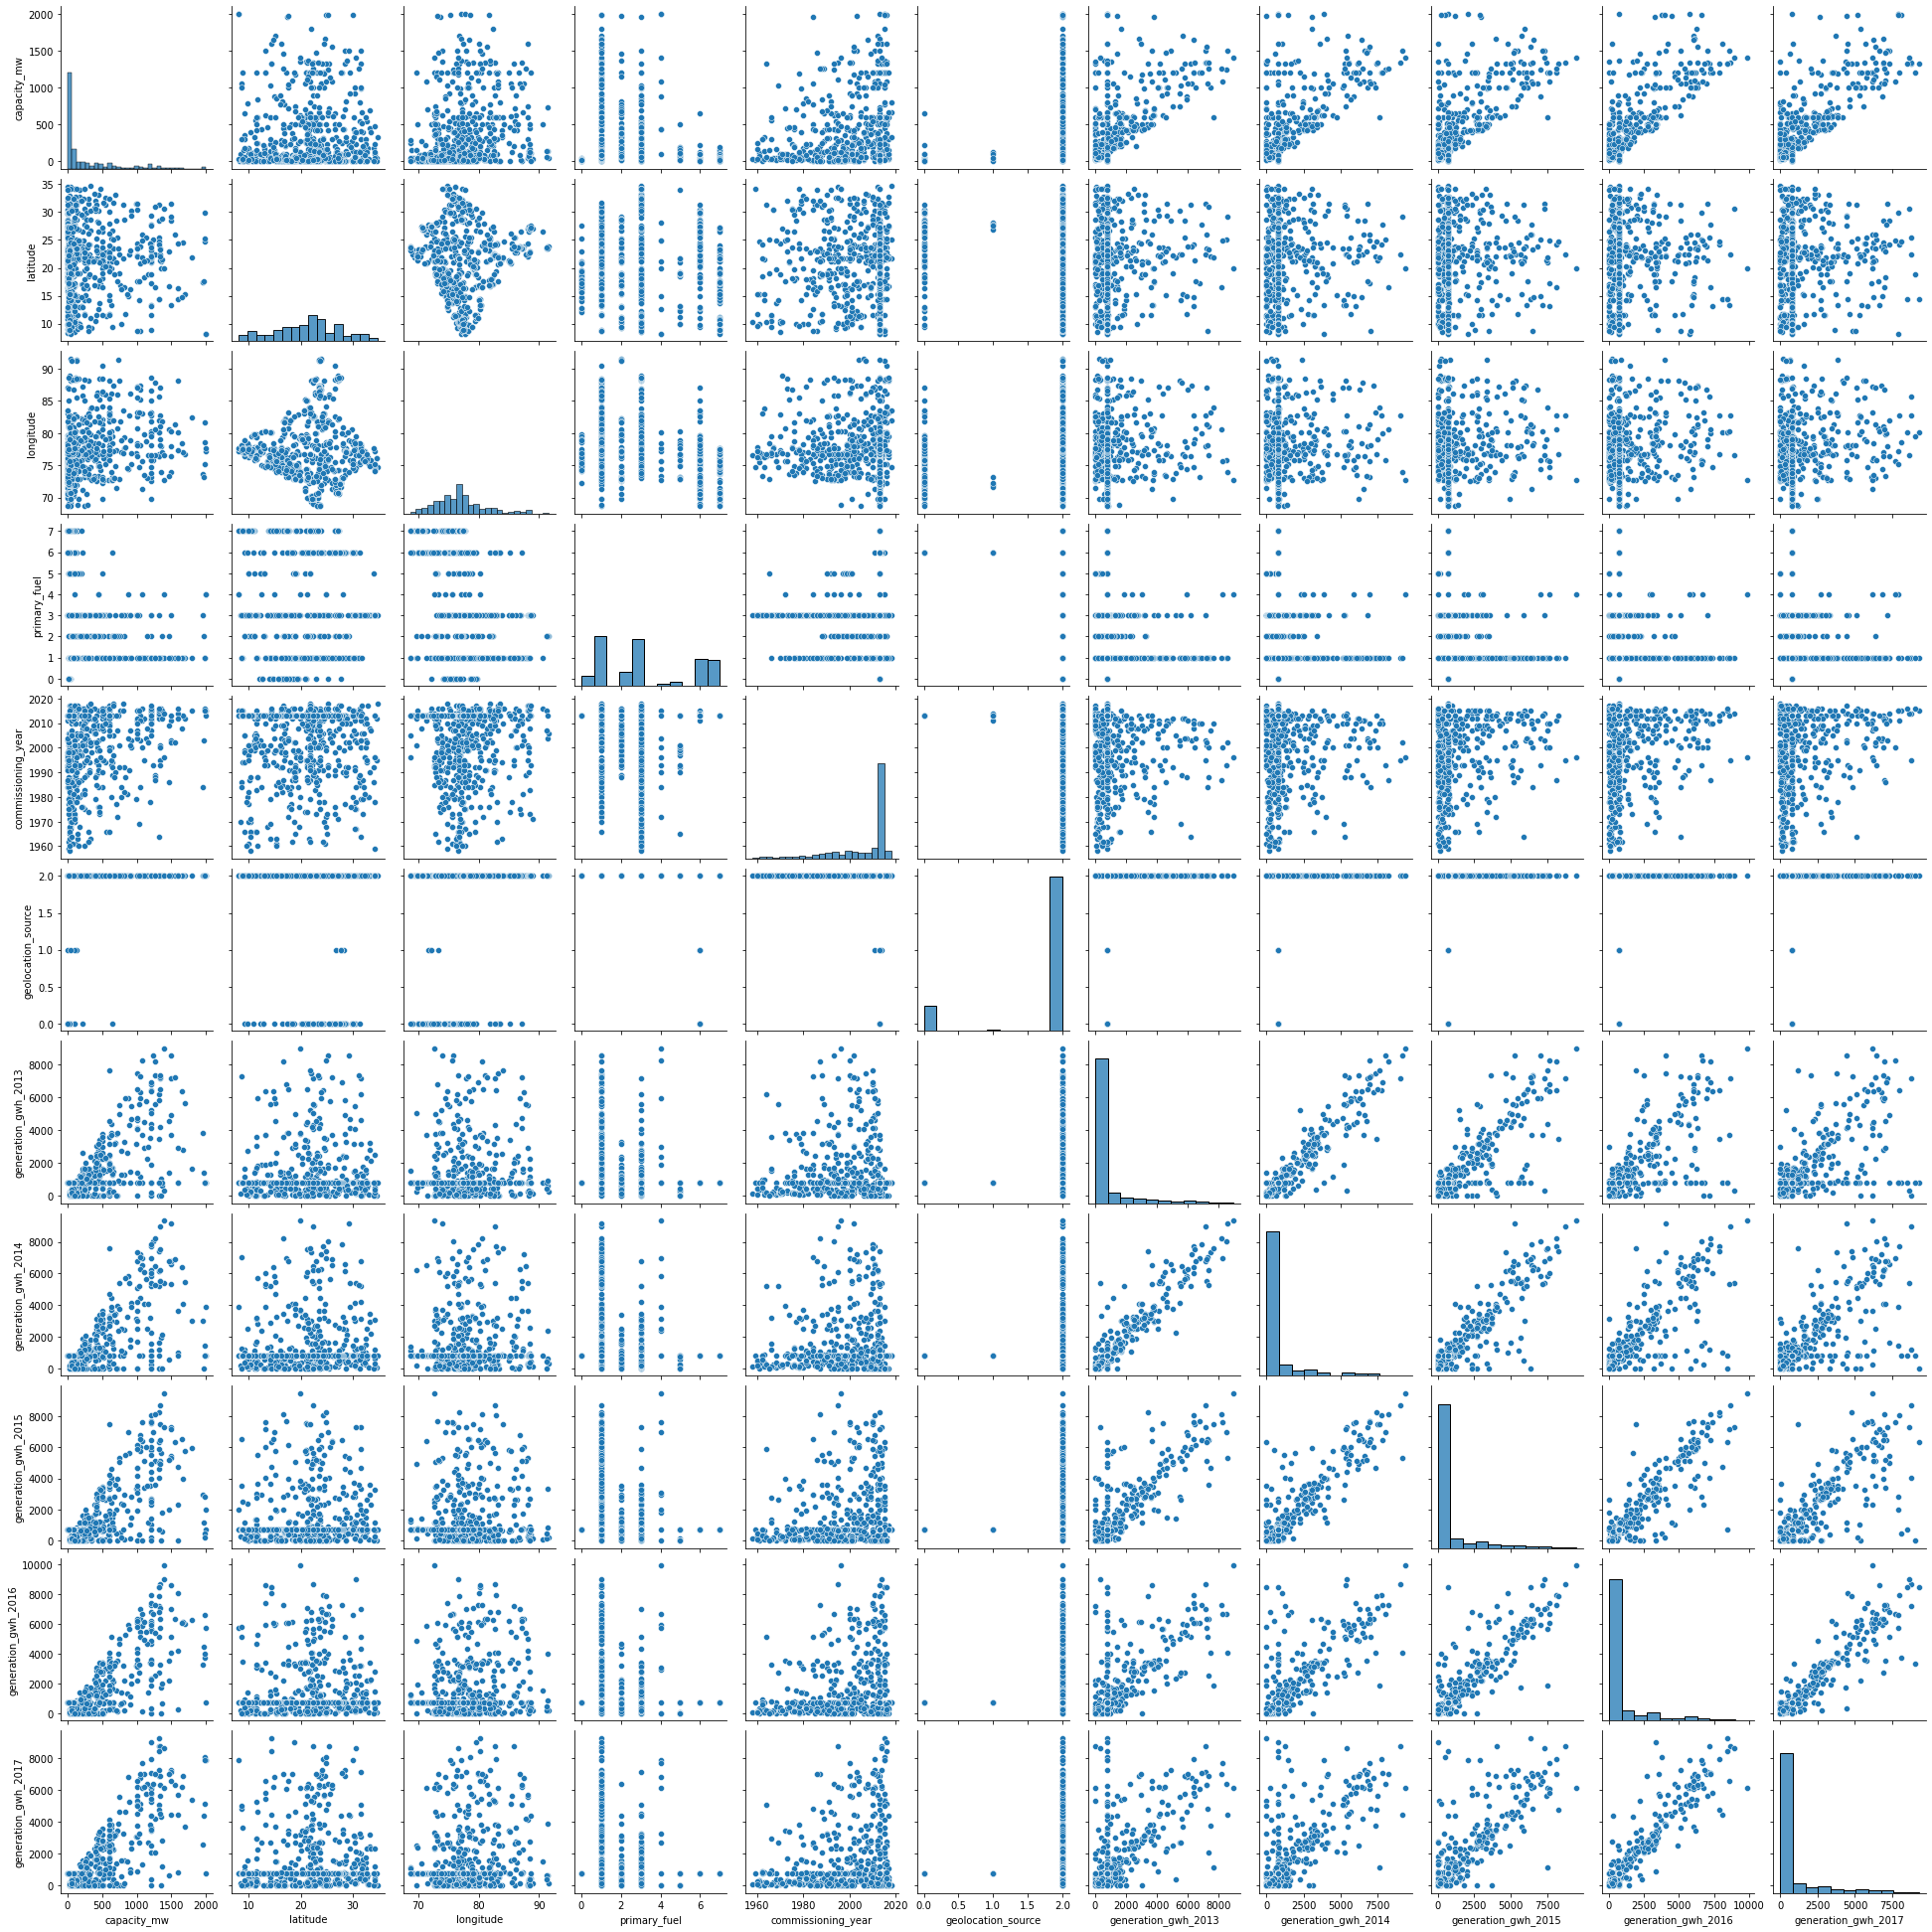

In [266]:
sn.pairplot(df_new)

primary fuel with coal has high capacity_mw

coal fuel has high generation in all the years 2013,2014,2015,2016,2017



In [232]:
x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']
print(x.shape)
print(y.shape)

(849, 10)
(849,)


splitting the x and y variable

In [236]:
x.skew()

capacity_mw            0.074261
latitude              -0.124563
longitude              0.895847
commissioning_year    -1.618612
geolocation_source    -2.062603
generation_gwh_2013    0.411630
generation_gwh_2014    0.300049
generation_gwh_2015    0.449578
generation_gwh_2016    0.447591
generation_gwh_2017    0.292883
dtype: float64

In [234]:
x['generation_gwh_2013']=np.cbrt(x['generation_gwh_2013'])
x['generation_gwh_2014']=np.cbrt(x['generation_gwh_2014'])
x['generation_gwh_2015']=np.cbrt(x['generation_gwh_2015'])
x['generation_gwh_2016']=np.cbrt(x['generation_gwh_2016'])
x['generation_gwh_2017']=np.cbrt(x['generation_gwh_2017'])

In [235]:
x['capacity_mw']=np.log1p(x['capacity_mw'])

removed the skewness after using the above methods

# Scaling

In [237]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.638985,1.151300,-0.882809,0.456050,-1.034548,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
1,0.205188,0.593063,-0.557826,0.606035,0.407704,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
2,-0.292086,0.125497,-1.801376,0.606035,0.407704,-0.056847,-0.049673,-0.077108,-0.08184,-0.051120
3,0.380390,0.446856,3.420737,-0.068898,0.407704,-0.266451,-0.273974,0.075190,0.09040,-0.202453
4,1.805826,0.134726,1.294769,0.756020,0.407704,0.728142,1.422040,2.399137,2.40543,2.058641


scaled the dataset

# Training and testing of model

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [239]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [240]:
chosen_model(RandomForestClassifier)

best accuracy is 0.8044550883709672 on random state 139


In [241]:
chosen_model(DecisionTreeClassifier)

best accuracy is 0.6929218807401311 on random state 154


In [242]:
chosen_model(KNeighborsClassifier)

best accuracy is 0.7299357358926777 on random state 162


In [243]:
chosen_model(SVC)

best accuracy is 0.30419214479444556 on random state 92


In [244]:
chosen_model(AdaBoostClassifier)

best accuracy is 0.33970927072360024 on random state 85


In [245]:
chosen_model(GradientBoostingClassifier)

best accuracy is 0.7869880155941666 on random state 50


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)
from sklearn.model_selection import cross_val_score
score=cross_val_score(GradientBoostingClassifier(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.76229508 0.78688525 0.80165289 0.84297521 0.79338843 0.81818182
 0.80991736]
0.8021851471925986
0.02355079400962837


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
from sklearn.model_selection import cross_val_score
score=cross_val_score(AdaBoostClassifier(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.60655738 0.55737705 0.39669421 0.54545455 0.52892562 0.51239669
 0.52066116]
0.5240095225192095
0.05948211500404496


In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=92)
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVC(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.70491803 0.73770492 0.7107438  0.75206612 0.68595041 0.7768595
 0.74380165]
0.730292062631854
0.028963655105225153


In [249]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=162)
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsClassifier(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.71311475 0.73770492 0.74380165 0.82644628 0.76859504 0.80165289
 0.79338843]
0.7692434242359727
0.03722198057217108


In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=154)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeClassifier(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.75409836 0.74590164 0.80165289 0.75206612 0.73553719 0.80165289
 0.76859504]
0.7656434474616293
0.024541017755573085


In [251]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=139)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestClassifier(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.76229508 0.80327869 0.79338843 0.85950413 0.81818182 0.83471074
 0.84297521]
0.8163334430100451
0.030546634986729583


after seeing the model performance and cross val score the least difference between the two is in RandomForestClassifier model

# Hyperparameter tuning

In [252]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [253]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [254]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [255]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [256]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [257]:
fuel_mod=RandomForestClassifier(max_features='log2',max_depth=9,min_samples_leaf=1,min_samples_split=3)
fuel_mod.fit(x_train,y_train)
pred=fuel_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.56227758007117


after hyperparameter tuning this is the best accuracy we are getting

# AUC-ROC

In [189]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [258]:
y_pred_prob=fuel_mod.predict_proba(x_test)

In [264]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovo')

0.9479024306546641

roc_auc_score is good with 94.79%

# Saving the model

In [267]:
import joblib
joblib.dump(fuel_mod,"primaryFuel_prediction.pkl")

['primaryFuel_prediction.pkl']